### Imports

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load and Read dataset

In [13]:
marketing = pd.read_csv(
    filepath_or_buffer='marketing.csv', 
    parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

In [31]:
# marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


## What does a data analyst on a marketing team do?
. Analyzing marketing campaign performance <br>
. Attributing credit to marketing channel <br>
. A/B testing <br>

#### do some EDA

In [55]:
# marketing.describe()

In [24]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10037 non-null  bool          
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          10037 non-null  bool          
dtypes: bool(2), datetime64[ns](3), object(7)
memory usage: 803.9+ KB


- change dtypes of columns

In [23]:
marketing['converted'] = marketing['converted'].astype('bool')
marketing['is_retained'] = marketing['is_retained'].astype('bool')

In [37]:
# print(marketing['marketing_channel'].value_counts())

channel_code_dict = {
    "House Ads": 0,
    "Instagram": 1,
    "Facebook": 2,
    "Push": 3,
    "Email": 4,
}

marketing['channel_code'] = marketing['subscribing_channel'].map(channel_code_dict)

In [38]:
marketing['is_correct_lang'] = np.where(
    marketing['language_displayed'] == marketing['language_preferred'],
    'Yes',
    'No'
)

In [45]:
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek
marketing['Year'] = marketing['date_subscribed'].dt.year
marketing['Day'] = marketing['date_subscribed'].dt.day
marketing['month'] = marketing['date_subscribed'].dt.month

### How many users see our marketing assets?

In [47]:
daily_user = marketing.groupby(['date_served'])['user_id'].nunique()

In [52]:
daily_user

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64

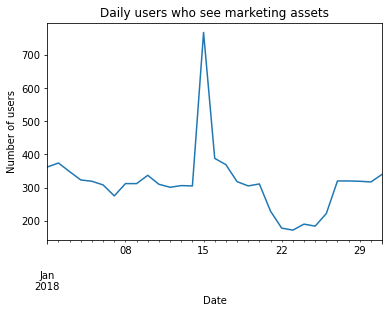

In [64]:
daily_user.plot()

plt.title("Daily users who see marketing assets")
plt.xlabel("Date")
plt.ylabel("Number of users")

plt.show()

- Much like in daily users who view marketing assets, there's a large peak around the time when an email blast goes out.

In [65]:
daily_active_users = marketing.groupby(['Day'])['user_id'].nunique()

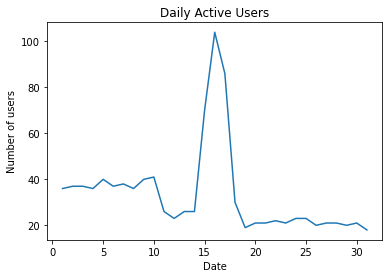

In [66]:
daily_active_users.plot()

plt.title("Daily Active Users")
plt.xlabel("Date")
plt.ylabel("Number of users")

plt.show()

# Analyzing campaign metrics

### Was the campaign successful?

- Conversion Rate <br>
- Retention Rate

In [98]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang,DoW,Year,Day,month
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0,Yes,0.0,2018.0,1.0,1.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0,Yes,0.0,2018.0,1.0,1.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0,Yes,0.0,2018.0,1.0,1.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0,Yes,0.0,2018.0,1.0,1.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,0.0,Yes,0.0,2018.0,1.0,1.0


In [103]:
# conversion_rate

converted_users = marketing[marketing['converted'] == True]['user_id'].nunique()
total_users = marketing['user_id'].nunique()
conv_rate = converted_users / total_users

conversion_rate = round(conv_rate*100, 2)
print(f"Conversion Rate is -----> {conversion_rate}%")

Conversion Rate is -----> 14.09%


is it a good conversion rate? <br>
answer: depends on. <br>
This will depend heavily on your business. There is no particular number that all marketing teams are trying to reach. Instead, when you're working on a marketing team, it helps to look at historical data to determine whether a conversion rate is what you would expect.

In [107]:
# retention rate = retained_users / total_subscribed

total_subscribed = marketing[marketing['converted'] == True]['user_id'].nunique()
# retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()
converted_users = marketing[marketing['converted'] == True]
retained_users = converted_users[converted_users['is_retained'] == True]['user_id'].nunique()
reten_rate = retained_users / total_subscribed

retention_rate = round(reten_rate*100, 2)
print(f"Retention Rate is -----> {retention_rate}%")

Retention Rate is -----> 67.57%


Much like with conversion rate, there is no retention rate that will apply across businesses and industries. <br>
Look at historical retention rates or retention rates of companies in a similar industry to interpret your results

# Customer Segmentation

- marketing channels

Conversion rate for each marketing channel is: subscribing_channel
Email         83.85
Facebook     100.00
House Ads    100.00
Instagram    100.00
Push         100.00
Name: user_id, dtype: float64


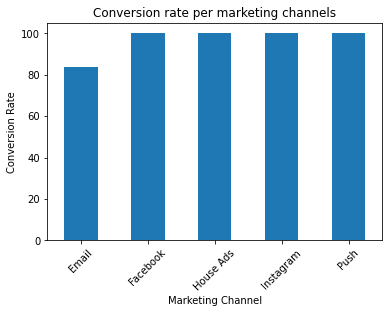

In [142]:
# conversion rate 

converted_channels = marketing[marketing['converted'] == True].groupby(['subscribing_channel'])['user_id'].nunique()
total_users_channels = marketing.groupby(['subscribing_channel'])['user_id'].nunique()

conv_rate_channels = round((converted_channels/total_users_channels)*100,2)
print(f"Conversion rate for each marketing channel is: {conv_rate_channels}")



# visualize
conv_rate_channels.plot(kind='bar')

plt.title("Conversion rate per marketing channels")
plt.xlabel("Marketing Channel")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)

plt.show()

Retention rate for each marketing channel is: subscribing_channel
Email        73.29
Facebook     68.78
House Ads    58.05
Instagram    68.10
Push         70.13
Name: user_id, dtype: float64


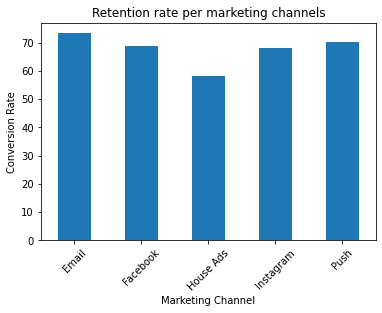

In [144]:
# conversion rate 

converted = marketing[marketing['converted'] == True]

retained_channels = converted[converted['is_retained'] == True].groupby(['subscribing_channel'])['user_id'].nunique()
total_subscribers = marketing[marketing['converted'] == True].groupby(['subscribing_channel'])['user_id'].nunique()

reten_rate_channels = round((retained_channels/total_subscribers)*100, 2)
print(f"Retention rate for each marketing channel is: {reten_rate_channels}")


# visualize
reten_rate_channels.plot(kind='bar')

plt.title("Retention rate per marketing channels")
plt.xlabel("Marketing Channel")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)

plt.show()

- language

conversion rate for language displayed: language_displayed
Arabic     50.00
English    13.13
German     71.62
Spanish    20.00
Name: user_id, dtype: float64


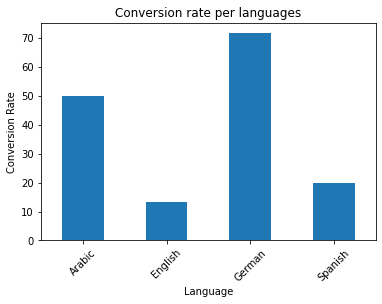

In [145]:
# conversion rate 


convert_languages = marketing[marketing['converted'] == True].groupby(['language_displayed'])['user_id'].nunique()
total_user_language = marketing.groupby('language_displayed')['user_id'].nunique()

conv_rate_language = round((convert_languages/total_user_language)*100, 2)
print(f"conversion rate for language displayed: {conv_rate_language}")

# visualize
conv_rate_language.plot(kind='bar')

plt.title("Conversion rate per languages")
plt.xlabel("Language")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)

plt.show()

- conversion rate per day

date_served
2018-01-01     9.94
2018-01-02     9.89
2018-01-03    10.34
2018-01-04    10.84
2018-01-05    12.54
2018-01-06    11.36
2018-01-07    14.18
2018-01-08    11.54
2018-01-09    12.50
2018-01-10    11.87
2018-01-11     8.06
2018-01-12     7.64
2018-01-13     8.50
2018-01-14     8.52
2018-01-15    11.34
2018-01-16    25.52
2018-01-17    21.95
2018-01-18     9.12
2018-01-19     5.90
2018-01-20     6.75
2018-01-21     8.73
2018-01-22    12.36
2018-01-23    12.21
2018-01-24    11.58
2018-01-25    12.50
2018-01-26     9.01
2018-01-27     6.56
2018-01-28     6.25
2018-01-29     5.96
2018-01-30     6.62
2018-01-31     5.29
Name: user_id, dtype: float64


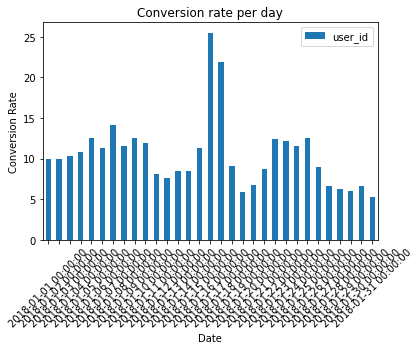

In [149]:
total_per_day = marketing.groupby(['date_served'])['user_id'].nunique()
converted_per_day = marketing[marketing['converted'] == True].groupby(['date_served'])['user_id'].nunique()

conv_per_day = round((converted_per_day/total_per_day)*100, 2)
print(conv_per_day)


# visualize

conv_per_day_df.plot(kind='bar')

plt.title("Conversion rate per day")
plt.xlabel("Date")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)

plt.show()